# Nonogram Puzzle Game
## React & Flask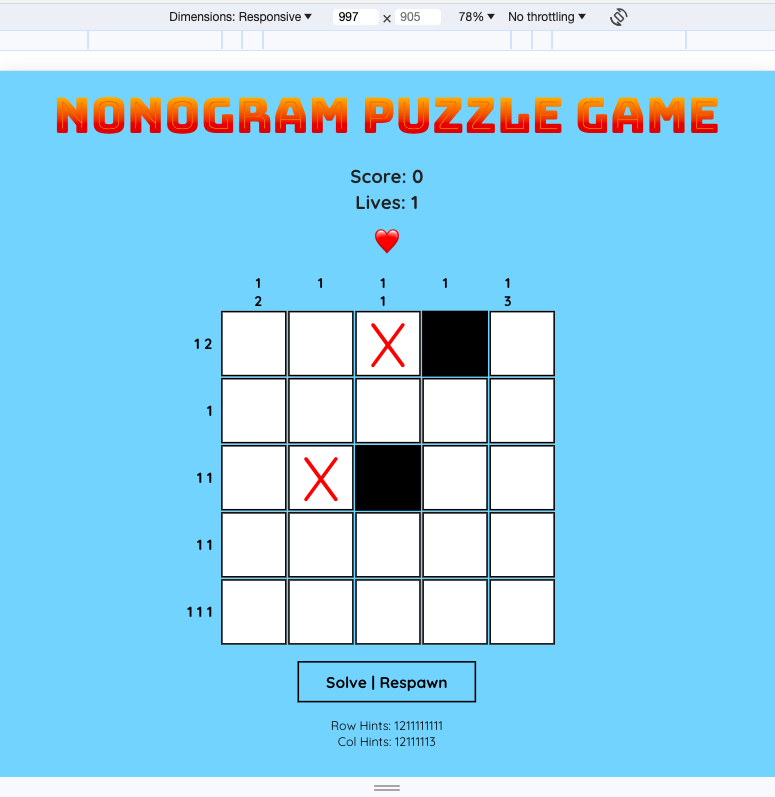

*Link* https://nonogram-82919.web.app/
  
*server* https://nonogram-server-ff86d4a3cb11.herokuapp.com


HTTP is a protocol for communication between a client and a server. It allows clients to request resources from a server and to send data to the server. The two most commonly used HTTP methods are GET and POST.

GET requests are used to retrieve data from a server. They are used to retrieve web pages, images, videos, and other resources. When you type a URL into your browser's address bar, you are making a GET request to the server. GET requests can be cached and bookmarked, so they are often used for static content that doesn't change frequently.

POST requests are used to send data to a server. They are used to submit forms, upload files, and perform other actions that require data to be sent to the server. POST requests are not cached or bookmarked, so they are often used for dynamic content that changes frequently.

To connect and use GET and POST requests in a React app with Flask, you can use the fetch API, which allows you to make requests to a server and receive responses.

Here's a simple example of how to use GET and POST requests in a React app with Flask:

In [ ]:
# Flask app
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/data', methods=['GET'])
def get_data():
    data = {'name': 'John', 'age': 30}
    return jsonify(data)

@app.route('/data', methods=['POST'])
def post_data():
    name = request.json['name']
    age = request.json['age']
    return jsonify({'success': True, 'name': name, 'age': age})

if __name__ == '__main__':
    app.run()



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In this Flask app, we have defined two routes: /data for both GET and POST requests. The get_data function returns some sample data as a JSON object, while the post_data function expects a JSON object containing a name and an age, and returns a success message along with the received data.

Now, in the React app, we can use the fetch API to make a GET request to the Flask server to retrieve the data:

In [ ]:
// React component
import React, { useState, useEffect } from 'react';

function App() {
  const [data, setData] = useState(null);

  useEffect(() => {
    fetch('/ http://127.0.0.1:5000/data')
      .then(response => response.json())
      .then(data => setData(data))
      .catch(error => console.error(error));
  }, []);

  return (
    <div>
      <h1>{data ? `Name: ${data.name}, Age: ${data.age}` : 'Loading...'}</h1>
    </div>
  );
}

export default App;


In this Flask app, we have defined two routes: /data for both GET and POST requests. The get_data function returns some sample data as a JSON object, while the post_data function expects a JSON object containing a name and an age, and returns a success message along with the received data.



So let's implement the knowledge of the Flask backup server for our nonogram engine that will run through Heroku, regenerating the matrix, that the player has to solve

# Console Engine (backend)

### Engine Summary:
Nonogram Game Logic: The create_nonogram function generates a Nonogram puzzle grid of a specified size (rows x columns), with each cell randomly set as either filled (1) or empty (0). It calculates row and column hints, indicating the number of consecutive filled cells in each row and column, with a limit (max_sequential_val) on the length of these hints to keep the game manageable.

Flask Server for Game Data: The Flask app defines a route (/data or /grid) that, when accessed, invokes the create_nonogram function to generate a new Nonogram puzzle. The server then sends the grid, along with row and column hints, as JSON data, which can be used by a client-side application (like a web or mobile game).

Demonstration and Testing: The script includes a demonstration section where it generates a Nonogram puzzle using specified parameters and prints the game board and hints to the console. It also includes a flag (generate) to easily toggle this demo on or off.

In [ ]:
"""
  ____                      _        _____             _
 / ___|___  _ __  ___  ___ | | ___  | ____|_ __   __ _(_)_ __   ___
| |   / _ \| '_ \/ __|/ _ \| |/ _ \ |  _| | '_ \ / _` | | '_ \ / _ \
| |__| (_) | | | \__ \ (_) | |  __/ | |___| | | | (_| | | | | |  __/
 \____\___/|_| |_|___/\___/|_|\___| |_____|_| |_|\__, |_|_| |_|\___|
                                                 |___/

"""

#CONSOLE ENGINE NONOGRAM
import random


def create_nonogram(rows, columns, max_sequential_val):
    # Create an empty board matrix
    grid = [[0 for _ in range(columns)] for _ in range(rows)]
    """Same as:
    grid2 = []
    for i in range(rows):  # Iterate over rows
        row = []  # Create a temporary list for the row
        for j in range(columns):  # Iterate over columns
            row.append(0)  # Add a 0 for each column in this row
        grid2.append(row)  # Add the completed row to the grid
    # To print each row
    for i in grid2:
        print(i)
    """

    print("--Matrix created--")
    for i in grid:
        print(i)

    # Init hints for rows and columns
    row_hints = []
    col_hints = []

    #Generate random row values bw 0/1 and add them to the hints
    #Iterate inside the grid and randomly generate the field
    for i in range(rows):

        #Continuous variable tracking the generator
        temp= 0
        #Local var hints list
        hint = []

        #Loop inside the columns for hints and assign grid values
        for j in range(columns):
            # Randomly decide if the square should be colored or not
            if random.random() > 0.5: #If random [0,1) is closer to 1 than temp rises
                grid[i][j] = 1 #[row_range][col_range] set the black box state
                temp += 1
            else:
                #Check if the temp is positiv and add it to the local hint
                if temp > 0:
                    hint.append(temp)
                    temp = 0 #zanuli
        if temp > 0:
            hint.append(temp)
        row_hints.append(hint)

    #Check if some value through the matrix is 1 and increase the temp variable to append it to the col hint
    for j in range(columns):
        temp = 0
        hint = []
        for i in range(rows):
            if grid[i][j] == 1:
                temp += 1
            else:
                if temp > 0:
                    hint.append(temp)
                    temp = 0
        if temp > 0:
            hint.append(temp)
        col_hints.append(hint)


    print("--Updated--")


    # By shortening the hints to a limited length acourding to max_sequential_val,
    # the code ensures that the hints provided to the player will not be too long and difficult to understand,
    # making the game more manageable and enjoyable.
    for i in range(len(row_hints)):
        row_hints[i] = row_hints[i][:max_sequential_val]
    for i in range(len(col_hints)):
        col_hints[i] = col_hints[i][:max_sequential_val]

    #Spit out the game board
    return (grid, row_hints, col_hints)




""" DEMO:
# Example usage:
#All public variables don't overflow with the local function variables named the same way
rows, columns, max_sequential_val = 5, 5, 2
puzzle = create_nonogram(rows, columns, max_sequential_val)
#tuple unpacking to assign the values returned from the function "create_nonogram" to three separate variables
grid, row_hints, col_hints = puzzle
print("Board:")
for i in range(rows):
    print(grid[i])
# print cols/rows hints
print("   Col hints:", col_hints)
for i in row_hints:
    print("Row hint" + str(i) + "\n")
"""

def generate_grid():

    print("Board:")
    for i in range(rows):
        print(grid[i])
    # print cols/rows hints
    print("   Col hints:", col_hints)
    for i in row_hints:
        print("Row hint" + str(i) + "\n")

#IMPLEMENTATION STATES
generate = True
if generate:
    # Choose the size of the matrix and config the sequential value as needed (for 5 and 6x scale you can keep it at 3 values at max)
    rows, columns, max_sequential_val = 5, 5, 3
    puzzle = create_nonogram(rows, columns, max_sequential_val)
    #tuple unpacking to assign the values returned from the function "create_nonogram" to three separate variables
    grid, row_hints, col_hints = puzzle
    generate_grid()
else: print('False')




"""FLASK

import json
from flask import Flask, jsonify

app = Flask(__name__)

@app.route('/nonogram')
def nonogram_data():
    rows, columns, max_sequential_val = 5, 5, 2
    puzzle = create_nonogram(rows, columns, max_sequential_val)
    grid, row_hints, col_hints = puzzle
    data = {
        'grid': grid,
        'row_hints': row_hints,
        'col_hints': col_hints
    }
    return jsonify(data)

if __name__ == '__main__':
    app.run(debug=True)

## Nonogram Pygame Demo
### with the same console engine as the React App
(for testing purposes)
Game Setup and Logic: It initializes Pygame, sets up the game window and constants, and generates a Nonogram puzzle using the console_engine. The player interacts with the game by clicking on cells to toggle their state, and the game checks these against the solution from console_engine.

Game Loop and Rendering: The main game loop handles player input, updates the game state, and renders the grid, player's actions, and hints. The game displays row and column hints, the player's progress, and indicates mistakes by drawing an 'X' on incorrect cells.

Game Restart and End Conditions: The game tracks the player's lives, ending the game when lives = 0 or the puzzle is solved. A winning or losing message is displayed accordingly on the pygame interface. After a delay, the game restarts, offering continuous play.



In [ ]:
#PYGAME NONOGRAM DEMO
import os
import sys
import random
import pygame
from console_engine import *
from console_engine import puzzle, grid, row_hints, col_hints



# Initialize game engine
pygame.init()

FPS = 60

# Define some colors RGB
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
GRAY = (100, 100, 100)
RED = (250, 10, 10)
GREEN=(0,255,0)
#Title
pygame.display.set_caption("Nonogram Puzzle Game")

# Define size of the game window
win_width = 600
win_height = 600


screen = (win_width,win_height)


# Create the game window
win = pygame.display.set_mode(screen)

# Define size of each box in the puzzle
box_size = int(500 / columns)



# Display the puzzle values in the console
print("Puzzle Board:")
for row in grid:
    print(row)


# Define the font for display of rows and columns
font = pygame.font.Font(None, 25)
font_winner=pygame.font.Font(None,100)


#Lives:
LIVES = 3

# Mistakes
def draw_x(row, col, color=RED):
    pygame.draw.line(win, color, (col * box_size, row * box_size), ((col + 1) * box_size, (row + 1) * box_size), 3)
    pygame.draw.line(win, color, ((col + 1) * box_size, row * box_size), (col * box_size, (row + 1) * box_size), 3)

# Function to display the rows and columns
def display_rows_cols():
    #Enumerating the hints lists and displaying each value on the right spot for rows&cols
    for i, num_val in enumerate(row_hints):
        text = font.render(str(num_val), True, BLACK)
        #win.blit(element, (x,y))
        win.blit(text, (510, i * box_size + box_size / 2))

    for i, num_val in enumerate(col_hints):
        text = font.render(str(num_val), True, BLACK)
        win.blit(text, (i * box_size + box_size / 2, 510))


def player_grid(rows_cols):
    # Initialize player grid with white boxes
    player_grid = [[0 for i in range(rows_cols)] for j in range(rows_cols)]
    print(player_grid)
    # return rows_cols
    return player_grid


# Create a grid for marking errors
error_grid = [[0 for _ in range(columns)] for _ in range(rows)]


def main():

    global winner
    winner = False

    # Reset lives and error grid
    global LIVES
    LIVES = 3
    for i in range(rows):
        for j in range(columns):
            error_grid[i][j] = 0


    rows_cols=int(input("Enter number of rows and cols: "))
    if rows_cols == 5:
        p_grid=player_grid(rows_cols)
    else:
        print("Grid is limited to 5 for now.")
        rows_cols=int(input("Enter number of rows and cols: "))
        p_grid=player_grid(rows_cols)


    clock = pygame.time.Clock()
    run = True

    while run:
        # ... (event processing)
        #FPS
        clock.tick(FPS)
        for event in pygame.event.get():
            #If clicked the X-to-close
            if event.type == pygame.QUIT:
                exit_button=True
                run = False

            #MouseClick
            if event.type == pygame.MOUSEBUTTONUP:

                # Get the row and column number of the box clicked by the player
                row_clicked = int(event.pos[1] / (box_size))
                col_clicked = int(event.pos[0] / (box_size))

                # Check if the clicked cell is a mistake or not
                if p_grid[row_clicked][col_clicked] == grid[row_clicked][col_clicked]:
                    LIVES -= 1
                    print(f"You have {LIVES} Lives")
                    error_grid[row_clicked][col_clicked] = 1
                    draw_x(row_clicked, col_clicked)
                    if LIVES <= 0:
                        winner = False
                        run = False
                        print("Out of lives :(")

                # Toggle Fill the boxes white/black
                elif p_grid[row_clicked][col_clicked] == 0:
                    p_grid[row_clicked][col_clicked] = 1
                else:
                    p_grid[row_clicked][col_clicked] = 0

                #... (rest of your checks)
                if all(all(p_grid[row][col] == grid[row][col] for col in range(0,len(p_grid[row]))) for row in range(len(p_grid))):

                    winner=True
                    # run=False




        #Clear the display
        win.fill(WHITE)

        #Display hints
        display_rows_cols()

        #Draw
        for row in range(rows_cols):
            for col in range(rows_cols):
                pygame.draw.rect(win, GRAY, (col * box_size,row * box_size, box_size, box_size),2)
                if error_grid[row][col] == 1:  # Check if a cell is marked as a mistake
                    draw_x(row, col)
                elif p_grid[row][col] == 1:
                    pygame.draw.rect(win, BLACK, (col * box_size,row * box_size +1, box_size - 1, box_size - 1))


        #Generate empty grid


        #Draw
        for row in range(rows_cols):
            for col in range(rows_cols):                                                        #thikness
                pygame.draw.rect(win, GRAY, (col * box_size,row * box_size, box_size, box_size),2)
                #   DEFINED FOR 1s
                if p_grid[row][col] == 1:
                    pygame.draw.rect(win, BLACK, (col * box_size,row * box_size +1, box_size - 1, box_size - 1))
                #   CLICKED BY THE PLAYER -> 2s
                if p_grid[row][col] == 2:
                    pygame.draw.rect(win, BLACK, (col*box_size+1,row*box_size + 1, box_size - 1, box_size - 1))

        if winner==True:
            p_grid.clear()
            win.fill(GREEN)
            text = font_winner.render("YOU WIN!", True, RED)
            print("You win!")
            win.blit(text, (140,230))

            run=False
        #Update screen
        pygame.display.update()




    # States
    if not(run):
        print("See you!")
        if LIVES == 0:
            print("Game Over")
        else:
            print("Nice!")





    #wait time: Let player see the final screen for 5 seconds
    pygame.time.delay(5000)
    #main function calls itself at the end to restart the game, which is a recursive approach.
    main()  # Restart the game

# Quit the game
    pygame.quit()
#Restart the engine.py module (the whole file)
    #os.execv(sys.executable, ['python'] + sys.argv)






if __name__ == "__main__":
    main()



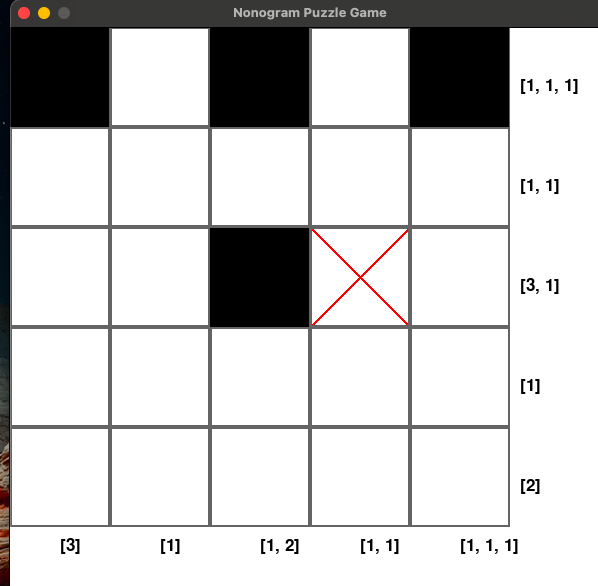


# Nonogram React Front-End

Game Initialization and State Management: We set up the initial state for the game, including grid size, player grid, backend grid, hints, score, messages and lives. The game fetches grid data from the backend server and dynamically adjusts grid size based on the window width.

User Interaction and Game Logic: The PlayerMatrix component handles user clicks on the grid, updating the player's grid state and decreasing lives for incorrect moves or solutions. It checks the player's grid against the backend grid, and updates the game state based on the player's success or failure, including scores and lives. Score is incremented +=10 after each win while lives +=1. For the dev version you can continue playing even when your Lives are 0, caused by too many mistakes, before you click respawn. In prod we won't need this.

Testing: Also back-end grid is displayed on the bottom of the page for testing purposes so the dev can easily check his solution with the backend matrix. In game-play this is not necessary so in prod it will be removed.


## Key Functions and Their Logic

- useState: Used to create and manage state in a functional component.
- useEffect: Used for side effects, running code on component mount/unmount or state changes.
- Arrow Functions: A concise way to write functions in JavaScript, used extensively in React.
- Event Handling: Functions that handle user interactions, like clicks.<input type="checkbox"></input>
- Conditional Rendering: Using JavaScript logic to render different UI elements based on conditions.
- Mapping Over Arrays: Used to render lists or grids of elements dynamically based on array data.
- JSON.stringify: Converts JavaScript objects or arrays to a JSON string, useful for comparison.
- await fetch: in diff to simple requests it waits for asynchronous function updates. We can also use AXIOS for security and range of browsers support.
- JSX: The code format is JSX (JS + HTML :: const element = <button style="background-color: white;">Hello, world!</button>;
) in diff to HTMX (used to enrich static HTML with dynamic behaviors)


In [ ]:
// Importing necessary Hooks from React and CSS for styling
import React, { useState, useEffect } from 'react';
import './matrix.css';

// Defining the Matrix component for the Nonogram puzzle game
const Matrix = () => {
  // set the size of the grid (number of rows and columns)
  const [gridSize, setGridSize] = useState(5);
  const [playerGrid, setPlayerGrid] = useState([]);
  const [backendGrid, setBackendGrid] = useState(null);
  //set msgs for feedback to the player (lost/won...)
  const [message, setMessage] = useState('');
  const [score, setScore] = useState(0);
  const [lives, setLives] = useState(3);
  const [rowHints, setRowHints] = useState([]);
  const [colHints, setColHints] = useState([]);
  //set window metrics for responsive rendering
  const [windowWidth, setWindowWidth] = useState(window.innerWidth);



  const fetchNewPuzzle = async () => {
    console.log(`Fetching new puzzle data`);
    try {
      // const response = await fetch(`http://localhost:5000/data?size=${gridSize}`);
      //wait for aynchronous requests from the backend python matrix generator hosted via heroku
      const response = await fetch(`https://nonogram-server-ff86d4a3cb11.herokuapp.com/data?size=${gridSize}`);
      //Test connection and catch errors

      if (!response.ok) {
        throw new Error(`HTTP error! Status: ${response.status}`);
      }
      //Log the data on the console to check the fetched grid and hints
      const data = await response.json();
      console.log("Fetched data from backend:", data);

      setBackendGrid(data.Grid);
      setRowHints(data.Row_hints);
      setColHints(data.Col_hints);
      console.log(rowHints, colHints)

      setPlayerGrid(data.Grid.map(row => row.map(() => 0))); // Initialize player grid with zeros
      setMessage('');

    } catch (error) {
      console.error("Error fetching data:", error);
      setMessage(`Error fetching new puzzle: ${error.message}`);
    }
  };

  // Fetch new puzzle only on component mount or when gridSize changes
  useEffect(() => {
    fetchNewPuzzle();
  }, [gridSize]);


  const handleBoxClick = (rowIndex, colIndex) => {

    // Check if the clicked box should reduce a life
    const shouldReduceLife = playerGrid[rowIndex][colIndex] !== 2 && backendGrid[rowIndex][colIndex] !== 1;

    setPlayerGrid(current =>
      current.map((row, rIdx) =>
        rIdx === rowIndex ? row.map((col, cIdx) => {
          if (cIdx === colIndex) {
            if (backendGrid[rowIndex][colIndex] === 1) {
              // If backend grid cell is filled, fill the player cell
              return 1;
            } else {
              // If backend grid cell is empty, mark with X
              return col === 2 ? 0 : 2; // Toggle X mark
            }
          }
          return col;
        }) : row
      )
    );

    // Reduce life if necessary, outside the map function
    if (shouldReduceLife) {
      setLives(lives => Math.max(lives - 1, 0));
    }
  };


  // Effect hook for handling window resize events
  useEffect(() => {

    const handleResize = () => setWindowWidth(window.innerWidth);

    window.addEventListener('resize', handleResize);
    // Cleanup function to remove the event listener
    return () => window.removeEventListener('resize', handleResize);
  }, []);

  //JSX for rendering the player grid based on the user-window size
  const renderGrid = () => {

    const baseSquareSize = windowWidth < 650 ? Math.max(20, 300 / gridSize) : Math.max(20, 400 / gridSize);
    const squareSize = Math.min(baseSquareSize, 100); // Limit the maximum size
    //const squareSize = Math.max(20, 400 / gridSize); // Adjust size based on gridSize
    const rowHintWidth = Math.max(20, 0 / gridSize) * 2; // Adjust row hint width based on gridSize
    const colHintWidth = Math.max(20, 0 / gridSize) * 2; // Adjust row hint width based on gridSize

    return (
      <>
        <div className="hints-container">
          <div className="top-left-corner-hint"></div>
          {colHints.map((hint, index) => (
            <div className="col-hint" key={index} style={{ width: `${squareSize}px` }}>
              {hint.map((h, idx) => (
              <div key={idx} className="single-col-hint">
                  {h}
                </div>
              ))}
            </div>
          ))}
           </div>

        {playerGrid.map((row, rowIndex) => (


          <div className="grid-row-with-hints" key={rowIndex} style={{ alignItems: 'center' }}>
            <div className="row-hints">
              {rowHints[rowIndex].join(' ')}
            </div>
            <div className="grid-row">
              {row.map((cell, colIndex) => (
                <div
                  className={`grid-square ${cell === 2 ? 'x-marked' : ''}`}
                  style={{ backgroundColor: cell === 1 ? "black" : "white", width: `${squareSize}px`, height: `${squareSize}px` }}
                  onClick={() => handleBoxClick(rowIndex, colIndex)}
                  key={`${rowIndex}-${colIndex}`}
                />
              ))}
            </div>
          </div>
        ))}
      </>
    );
  };

 // Arrow function as func. expression to render the lives as heart icons
  const renderLives = () => {
    return Array.from({ length: lives }, (_, i) => (
      <span key={i} className="heart-icon">❤️</span>
    ));
  };


  // Function to check if the player's solution matches the backend grid
  const checkSolution = () => {
    //Player wins if grids match
    if (JSON.stringify(playerGrid) === JSON.stringify(backendGrid)) {
      window.alert("You Win! Loading new puzzle...");
      setMessage("You Win! Loading new puzzle...");
      setScore(score + 10);
      setGridSize(prevSize => prevSize + 1); // Increase grid size by 1x1 for the next level
      setLives(lives => lives + 1); // // Grant an additional life
    } else {
      // Logging for testing purposes
      console.log("Solution incorrect. Player needs to keep trying.");
      console.log("Player grid at check:", JSON.stringify(playerGrid));
      console.log("Backend grid for comparison:", JSON.stringify(backendGrid));
      //setMessage("Keep trying!");
      setLives(lives - 1);
      if (lives <= 1) {
        setGridSize(5); // Reset Grid Size to 5x5
        fetchNewPuzzle(); // Fetch a new puzzle
        window.alert("Game Over & Respawn");
        setMessage("Game Over & Respawn");
        setScore(0); // Reset score
        setLives(3); // Reset lives
      } else {
        setMessage("Incorrect. Try again!");
      }
    }
  };


  // Main render function for the Matrix component
  return (
    <div className="nonogram-container">
      <h1>Nonogram Puzzle Game</h1>

      <div className="score">Score: {score}</div>
      <div className="lives">Lives: {lives}</div>
      <div className="lives">{renderLives()}</div>
      <div className="grid-container">{renderGrid()}</div>
      <button className="solve-button" onClick={checkSolution}>Solve | Respawn</button>
      <div className="message">{message}</div>
      <div className='rowHints'>Row Hints: {rowHints}</div>
      <div className='rowHints'>Col Hints: {colHints}</div>
      {backendGrid && (
        <div className="backend-grid-list">
          <h2>BackEnd Matrix for Testing:</h2>
          {backendGrid.map((row, index) => (
            <div key={index}>{row.join(', ')}</div>
          ))}
        </div>
      )}
    </div>
  );
};

//export the component to use it as such
export default Matrix;



# FLASK APP Back-End

Basic Server Setup: The server defines routes to handle HTTP requests, returning puzzle data and handling user interactions. The root route "/" gives a greeting message, indicating the server is running.

Nonogram Puzzle Generation: The "/data" route generates a Nonogram puzzle based on the requested size, with a default size of 5x5. The create_nonogram function from the console_engine_deploy module is used to create the puzzle, adjusting the maximum sequential value based on the grid size.

API Endpoints and JSON Responses: Additional routes like "/grid" provide specific game data, such as the game grid, in JSON format. The server also includes CORS (Cross-Origin Resource Sharing) headers to allow requests from different domains, facilitating the interaction with frontend applications like the React Nonogram game.


In [ ]:
from flask import Flask, jsonify, request
import datetime
from console_engine_deploy import create_nonogram
import os
from flask_cors import CORS

app = Flask(__name__)

@app.route("/")
def sayHi():
    return "Hello World! GO to /data for more data :)"

@app.route("/data", methods=['GET', 'POST'])
def nonogram_data():
    size = request.args.get('size', default=5, type=int)  # Get size from query parameter
    max_sequential = size - 2
    rows, columns, max_sequential_val = size, size, max_sequential
    puzzle = create_nonogram(rows, columns, max_sequential_val)
    grid, row_hints, col_hints = puzzle
    return {
        "Grid": grid,
        "Row_hints": row_hints,
        "Col_hints": col_hints
    }

@app.route("/grid", methods=['GET'])
def display_grid():
    size = request.args.get('size', default=5, type=int)  # Get size from query parameter
    puzzle = create_nonogram(size, size, 2)
    grid, _, _ = puzzle
    return jsonify(grid)

@app.route("/post", methods=['POST'])
def post_method():
    return "POST request"

@app.after_request
def after_request(response):
    response.headers.add('Access-Control-Allow-Origin', '*')
    response.headers.add('Access-Control-Allow-Headers', 'Content-Type,Authorization')
    response.headers.add('Access-Control-Allow-Methods', 'GET,PUT,POST,DELETE,OPTIONS')
    return response

if __name__ == '__main__':
    app.run(debug=True)



"""
@app.route("/some_route")
@cross_origin()  # Enables CORS for this specific route
def some_route_function():
    # Your route logic

#OR TO ENABLE CORS for the entire app:
app = Flask(__name__)
CORS(app)
"""


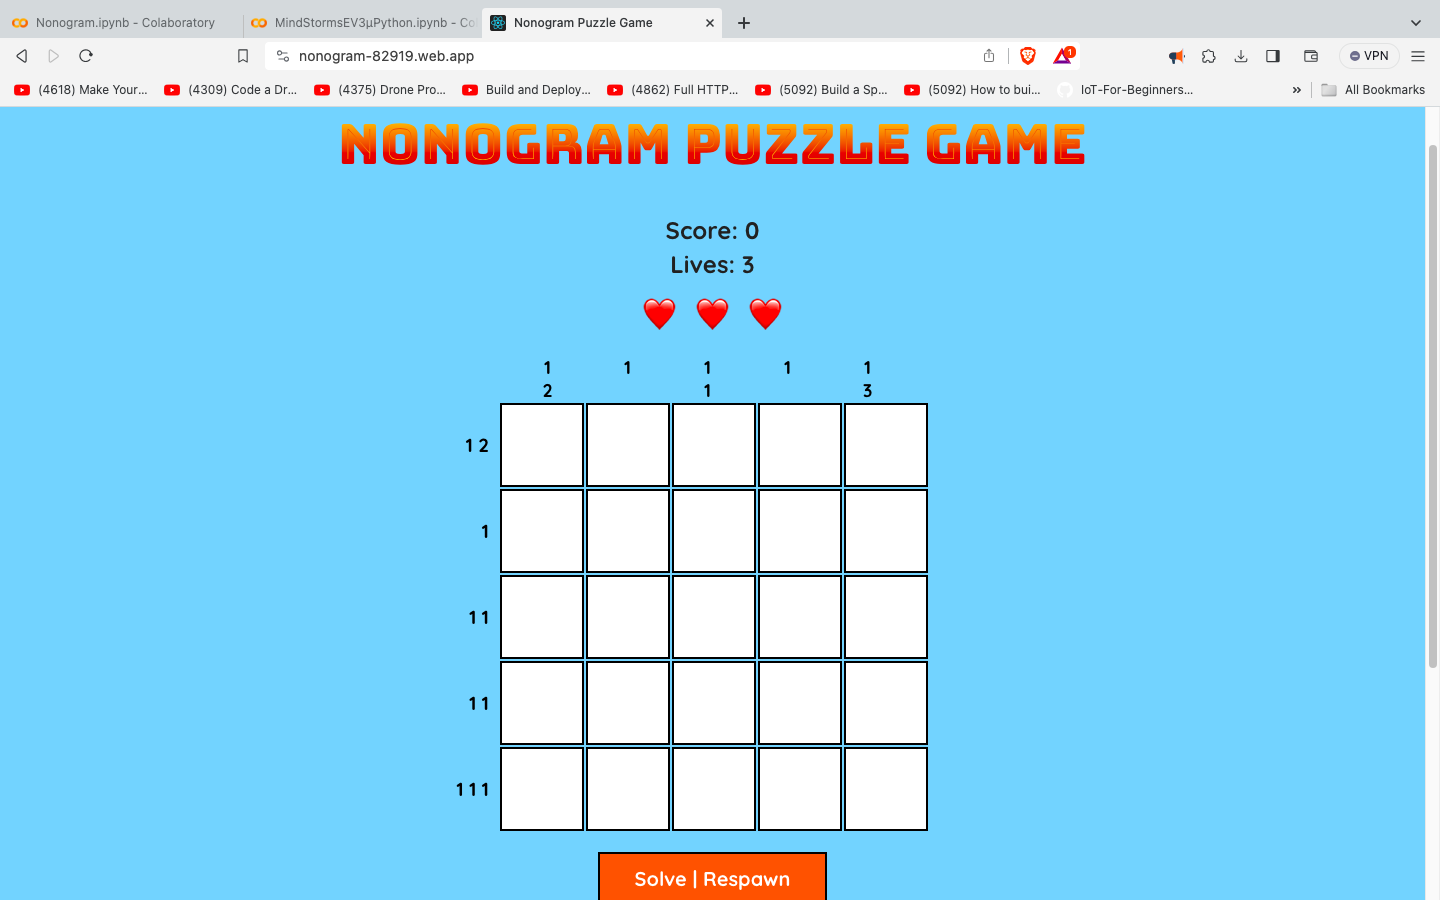

1. Local Development and Testing:
React App: Use npm start to run your React application locally for development and testing. This command starts a development server, typically accessible at http://localhost:3000. It watches for file changes and refreshes the browser automatically in real time. (This assumes that you have created your app with npx create-react-app app-name)
Flask Backend: For your Flask server, run it using python app.py (assuming your Flask file is named app.py). This will start the Flask server, typically accessible at http://localhost:5000.

2. Building React App for Production:
Use npm run build to create a production build of your React app. This command compiles your app into static files in the build directory. These files are optimized for performance and ready to be deployed. (make sure to add root)

3. Deploying React App to Firebase:
Initialize Firebase in your project directory using firebase init.(after npm install firebase) Follow the prompts to set up hosting.
Deploy the app using firebase deploy. This command uploads your build directory to Firebase Hosting, making your web app accessible online.

4. Deploying Flask Backend to Heroku:
Create a Heroku account and install the Heroku CLI.
Inside your Flask app directory, initialize a Git repository if you haven’t already (git init).
Log in to Heroku through the CLI (heroku login).
Create a Heroku app (heroku create).
Add a Procfile to specify the command to run your Flask app.
Deploy your code with git push heroku master.

5. Improving the App with Firestore and Scoreboard:
Firestore Integration: Implement a Firestore database to store user scores and nicknames. This allows for persistent, real-time data storage.
Scoreboard Feature: Create a Scoreboard component in React to display user scores. It fetches data from Firestore and updates in real-time as users play and score points.
User Nicknames: Allow users to enter their nicknames before starting the game. Save scores with these nicknames to Firestore, displaying them on the Scoreboard.
Authentication (Optional): For a more personalized experience, consider integrating Firebase Authentication. This way, users can have accounts, and their scores can be associated with their profiles.